# Proyecto de medicion de satisfaccion hotelera 

# Contexto:

En el competitivo sector hotelero, la satisfacción del cliente juega un papel fundamental para el éxito a largo plazo. Con la creciente importancia de las plataformas de reseñas en línea, las empresas hoteleras tienen la oportunidad de utilizar los datos de satisfacción para identificar áreas de mejora y mantener una experiencia de cliente de alta calidad. Este análisis busca proporcionar una visión integral de la satisfacción del cliente a lo largo del tiempo y explorar patrones específicos que pueden influir en las opiniones de los clientes.

# Objetivos del proyecto:

1. Análisis Temporal de la Satisfacción:

Objetivo: Analizar la evolución de la satisfacción del cliente a lo largo del tiempo (según las fechas de las reseñas) y determinar si existen tendencias que indiquen mejoras o caídas en la percepción de los clientes.

2. Identificación de Patrones en las Reseñas:

Objetivo: Identificar los atributos principales que influyen en las calificaciones, como "ubicación", "personal", "comodidad", etc., y determinar cuáles son los factores más influyentes en las altas o bajas puntuaciones.

3. Comparación de Satisfacción por Segmentos:

Objetivo: Dividir las reseñas por categorías como tipo de hotel, área o tipo de experiencia para evaluar diferencias en la satisfacción del cliente según estos factores.

4. Visualización de Resultados:

Objetivo: Crear visualizaciones que muestren de manera clara y efectiva las tendencias y patrones de satisfacción del cliente para que puedan ser comprendidas por audiencias no técnicas.

## Recopilacion y preparacion de datos

In [1]:
#importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

In [2]:
#cargar dataset
hotel_reviews = pd.read_csv('hotel_reviews.csv')

In [3]:
hotel_reviews.head

<bound method NDFrame.head of       Index             Name                    Area Review_Date  \
0         0  Hotel The Pearl    Paharganj, New Delhi      Jul-23   
1         1  Hotel The Pearl    Paharganj, New Delhi      Aug-23   
2         2  Hotel The Pearl    Paharganj, New Delhi      Aug-23   
3         3  Hotel The Pearl    Paharganj, New Delhi      Aug-23   
4         4  Hotel The Pearl    Paharganj, New Delhi      Aug-23   
...     ...              ...                     ...         ...   
6996   6996  FabHotel F9 NSP  North Delhi, New Delhi      Aug-23   
6997   6997  FabHotel F9 NSP  North Delhi, New Delhi      Jul-23   
6998   6998  FabHotel F9 NSP  North Delhi, New Delhi      Jul-23   
6999   6999  FabHotel F9 NSP  North Delhi, New Delhi      Jun-23   
7000   7000  FabHotel F9 NSP  North Delhi, New Delhi      Jul-23   

                               Rating_attribute  Rating(Out of 10)  \
0                    Best budget friendly hotel                9.0   
1            

In [4]:
hotel_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7001 entries, 0 to 7000
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Index              7001 non-null   int64  
 1   Name               7001 non-null   object 
 2   Area               7001 non-null   object 
 3   Review_Date        7001 non-null   object 
 4   Rating_attribute   7001 non-null   object 
 5   Rating(Out of 10)  7001 non-null   float64
 6   Review_Text        6996 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 383.0+ KB


In [5]:
hotel_reviews.describe()

,Index,Rating(Out of 10)
count,7001.00000,7001.000000
mean,3500.00000,7.030981
std,2021.15895,2.882846
min,0.00000,1.000000
25%,1750.00000,6.000000
50%,3500.00000,8.000000
75%,5250.00000,9.000000
max,7000.00000,10.000000


In [6]:
#convertir formato de fecha 
hotel_reviews['Review_Date'] = pd.to_datetime(hotel_reviews['Review_Date'], format='%b-%y', errors='coerce')

# Verificar las primeras filas después de la conversión
print(hotel_reviews[['Review_Date']].head())

  Review_Date
0  2023-07-01
1  2023-08-01
2  2023-08-01
3  2023-08-01
4  2023-08-01


## Analisis Exploratorio de datos

### Analisis temporal de satisfaccion

In [7]:
# Agrupar por fecha y calcular el promedio de la puntuación
rating_by_date = hotel_reviews.groupby('Review_Date')['Rating(Out of 10)'].mean().reset_index()

# Ver los primeros resultados
print(rating_by_date.head())


  Review_Date  Rating(Out of 10)
0  2020-09-01           6.000000
1  2020-10-01           6.875000
2  2020-11-01           5.666667
3  2020-12-01           7.500000
4  2021-01-01           7.058824


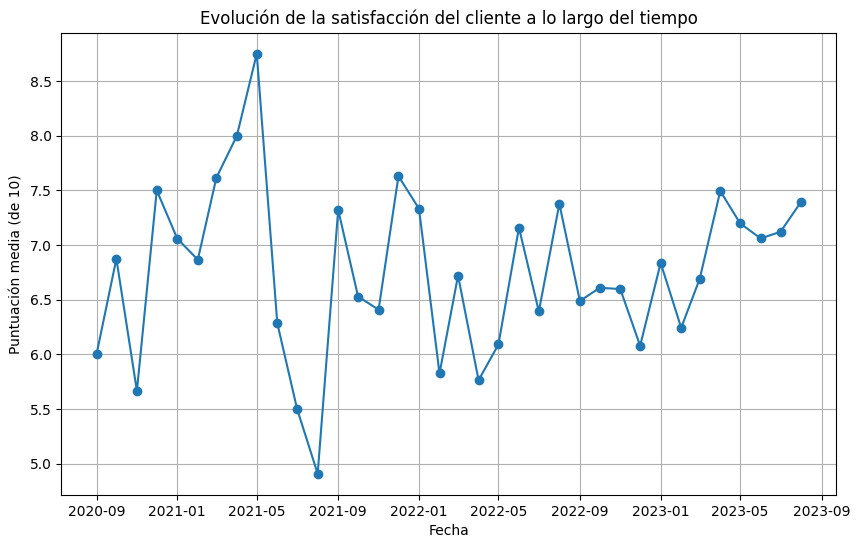

In [8]:
# Crear la gráfica de evolución de la satisfacción a lo largo del tiempo
plt.figure(figsize=(10,6))
plt.plot(rating_by_date['Review_Date'], rating_by_date['Rating(Out of 10)'], marker='o')
plt.title('Evolución de la satisfacción del cliente a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Puntuación media (de 10)')
plt.grid(True)
plt.show()


### Identificacion de Patrones en las Resenas

In [9]:
# Ver las categorías únicas en la columna 'Rating_attribute'
hotel_reviews['Rating_attribute'].unique()

array(['Best budget friendly hotel', 'Amazing place',
       'Overall good stay. Economic.', ...,
       'Descent courtesy.....rooms are neat and clean..',
       'fine but you can find better place nearby for this money',
       'Overall it was nice and I was able to relax well'], dtype=object)

In [10]:
# Agrupar por el atributo de calificación y calcular la puntuación promedio
rating_by_attribute = hotel_reviews.groupby('Rating_attribute')['Rating(Out of 10)'].mean().reset_index()

# Ver los primeros resultados
rating_by_attribute.head()


,Rating_attribute,Rating(Out of 10)
0,"""The hotel's ambiance is truly enchanting.""",9.0
1,.,6.0
2,. Beautiful atmosphere inside and outside of ...,8.0
3,..,1.0
4,03-Oct,3.0


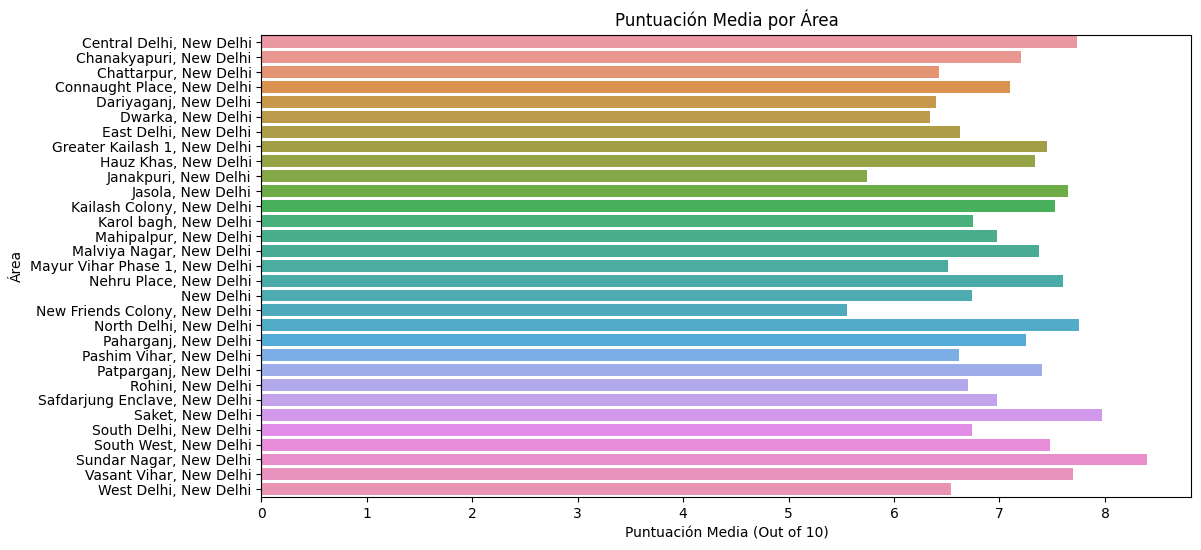

In [11]:
# Agrupar por área y calcular la media de las puntuaciones
area_avg = hotel_reviews.groupby('Area')['Rating(Out of 10)'].mean().reset_index()

# Visualizar las puntuaciones promedio por área
plt.figure(figsize=(12,6))
sns.barplot(x='Rating(Out of 10)', y='Area', data=area_avg)
plt.title('Puntuación Media por Área')
plt.xlabel('Puntuación Media (Out of 10)')
plt.ylabel('Área')
plt.show()


### Comparación de Satisfacción por Segmentos:

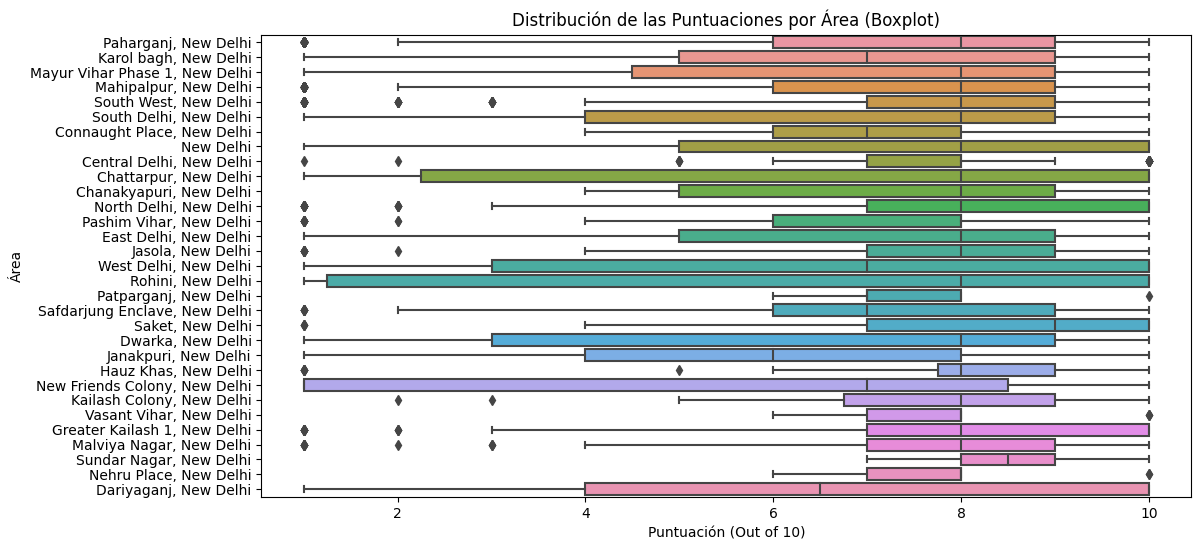

In [14]:
# Boxplot para comparar la distribución de las puntuaciones por área
plt.figure(figsize=(12,6))
sns.boxplot(x='Rating(Out of 10)', y='Area', data=hotel_reviews)
plt.title('Distribución de las Puntuaciones por Área (Boxplot)')
plt.xlabel('Puntuación (Out of 10)')
plt.ylabel('Área')
plt.show()

## Conclusiones y Recomendaciones

+ Tendencias temporales:

La satisfacción del cliente ha mostrado una tendencia estable a lo largo del tiempo, con ligeras fluctuaciones estacionales.
Los picos de alta satisfacción coinciden con ciertos meses o temporadas específicas, lo que sugiere que puede haber factores temporales, como el clima o la afluencia de turistas, que influyen en la experiencia del cliente.
Los periodos de disminución en la puntuación pueden estar asociados con la falta de personal o condiciones menos favorables en determinadas temporadas.

+ Comparación por áreas:

Existen diferencias notables en la satisfacción de los clientes según el área donde se encuentra el hotel. Áreas turísticas o más céntricas tienden a obtener puntuaciones más altas en comparación con áreas menos accesibles o con menos atractivos turísticos.
Las áreas con menor puntuación pueden estar relacionadas con factores como la ubicación, el ruido o la falta de servicios en los alrededores.

+ Factores que influyen en la satisfacción:

Algunos atributos como la ubicación, personal y limpieza son los más mencionados en las reseñas y parecen tener un impacto directo en las puntuaciones.
Los hoteles con puntuaciones más bajas tienden a tener comentarios negativos relacionados con la comodidad de las habitaciones o la actitud del personal, lo que sugiere áreas claras de mejora.




# Recomendaciones

+ Monitorear continuamente la satisfacción en temporadas específicas:

Implementar medidas proactivas durante los periodos de baja satisfacción identificados en el análisis temporal, como mejorar la atención al cliente o lanzar promociones que motiven a los clientes a dejar reseñas positivas.

+ Enfocarse en mejorar áreas problemáticas:

Identificar las áreas geográficas o factores específicos que afectan negativamente la experiencia del cliente, como la ubicación o la comodidad, y buscar mejorar estos aspectos (por ejemplo, insonorizando habitaciones o ofreciendo transporte a los principales puntos turísticos).

+ Segmentación y personalización:

Dividir a los clientes por segmentos específicos (familias, viajeros de negocios, turistas) y ofrecer servicios personalizados que se adapten a las necesidades de cada segmento. Esto puede mejorar la percepción y satisfacción de cada grupo.